In [205]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [206]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [207]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df.stops = pd.factorize(df.stops)[0]
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [208]:
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


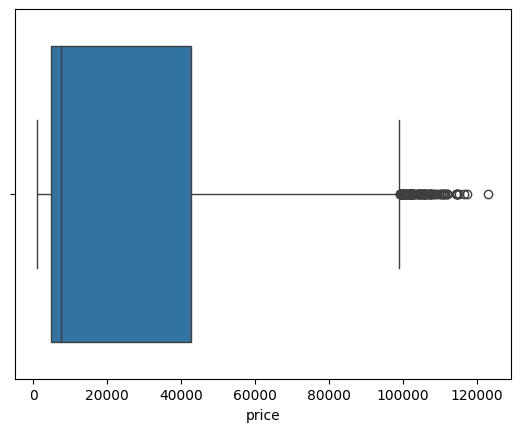

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price'])
plt.show()


XGBoost Regressor

In [210]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Separate features and target
# X = df.drop(columns=['price'])
# y = df['price']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the model
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0]
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)

# # Fit the GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best model and evaluate its performance
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# mse_xgb = mean_squared_error(y_test, y_pred)
# r2_xgb = r2_score(y_test, y_pred)


# print(f"Tuned XGBoost Model - Mean Squared Error: {mse_xgb:.2f}, R2 Score: {r2_xgb}")
# print(f"Best Parameters: {grid_search.best_params_}")


In [211]:
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Flight price')
# plt.ylabel('Predicted flight price')
# plt.title('Prediction vs Actual Flight Prices')

Random Forest Regression


In [212]:
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# use all available CPU cores for optimization and performance
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9850260211382434

In [213]:
import math
from sklearn.metrics import mean_absolute_error

y_pred = reg.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9850260211382434
MAE: 1086.0320771824047
MSE: 7762273.624126369
RMSE: 2786.0857172970054


Text(0.5, 1.0, 'Prediction vs Actual Flight Prices')

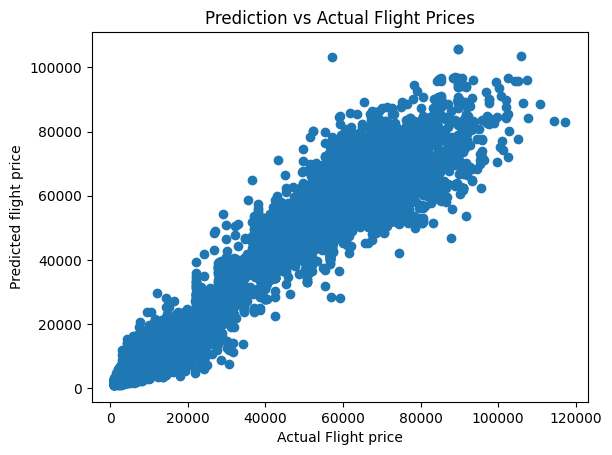

In [214]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight price')
plt.ylabel('Predicted flight price')
plt.title('Prediction vs Actual Flight Prices')

In [215]:
# analyze feature importance
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importance = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importance


[('class', np.float64(0.8806720334038695)),
 ('duration', np.float64(0.057186917456835115)),
 ('days_left', np.float64(0.018431651505102505)),
 ('airline_Air_India', np.float64(0.00521965428849722)),
 ('airline_Vistara', np.float64(0.004727838373258194)),
 ('source_Delhi', np.float64(0.003424150135874812)),
 ('dest_Delhi', np.float64(0.0032469842907497013)),
 ('source_Mumbai', np.float64(0.0022327769049679523)),
 ('dest_Mumbai', np.float64(0.0019794550422504334)),
 ('dest_Kolkata', np.float64(0.0018424873247597482)),
 ('source_Kolkata', np.float64(0.0017453777607218063)),
 ('stops', np.float64(0.0016483736515650923)),
 ('arrival_Evening', np.float64(0.001585540019911126)),
 ('dest_Hyderabad', np.float64(0.0015492498306849233)),
 ('source_Hyderabad', np.float64(0.0013888008158834053)),
 ('dest_Bangalore', np.float64(0.0012474163609056215)),
 ('arrival_Night', np.float64(0.0011667635905681312)),
 ('source_Bangalore', np.float64(0.001121392394239559)),
 ('departure_Evening', np.float64(0.

<BarContainer object of 5 artists>

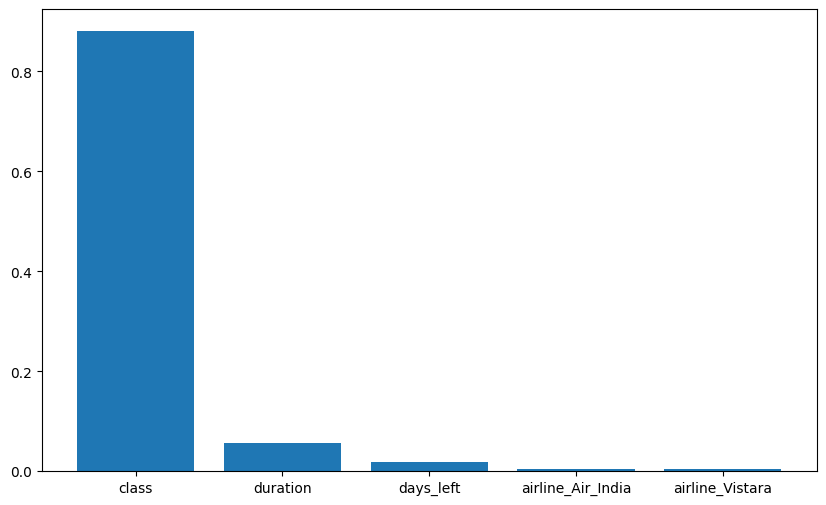

In [216]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importance[:5]], [x[1] for x in sorted_importance[:5]])



LightGBM Model

In [217]:
import lightgbm as lgb

X, y = df.drop('price', axis=1), df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    random_state=42
)

lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred_lgb = lgb_model.predict(X_test)

# Calculate and print error metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - Mean Squared Error: {mse_lgb:.2f}, R² Score: {r2_lgb:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 34
[LightGBM] [Info] Start training from score 20883.710389
LightGBM - Mean Squared Error: 10478129.39, R² Score: 0.98


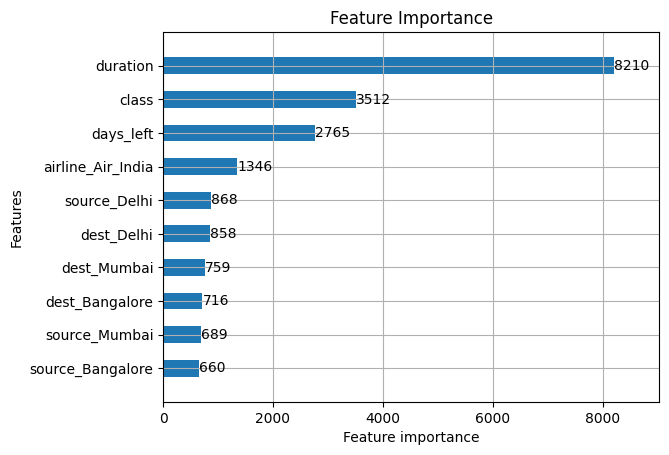

In [218]:
# Plot feature importance
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', height=0.5)
plt.title("Feature Importance")
plt.show()

Neural Network

In [224]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

X, y = df.drop('price', axis=1), df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def build_model(units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dense(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Create the KerasRegressor wrapper
model = KerasRegressor(
    model=build_model,
    units=64,
    activation='relu',
    optimizer='adam',
    epochs=50,
    batch_size=32,
    verbose=0
)

# Define the grid of parameters to search
param_grid = {
    'units': [64, 128],
    'activation': ['relu'],
    'optimizer': ['adam'],
    'batch_size': [32],
    'epochs': [50]
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)

# Fit GridSearchCV
grid_result = grid.fit(X_train, y_train)

# Use the best model for predictions
best_model = grid.best_estimator_

# Make predictions using the test set
y_pred_nn = best_model.predict(X_test)

# Evaluate error metrics from test and predicted data
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)


print(f"Neural Network - Mean Squared Error: {mse_nn:.2f}, R2 Score: {r2_nn:.2f}")

ModuleNotFoundError: No module named 'tensorflow.python.distribute.distribution_strategy_context'